Complete the exercises below For **Assignment #3**.

## Linear model with one numerical variable

Execute the following cell to load the [ISLR2](https://cran.rstudio.com/web/packages/ISLR2/index.html) and [Tidverse](https://www.tidyverse.org/) packages.

In [1]:
library('tidyverse')
library('ISLR2')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `ISLR2` package provides a dataset called `Boston` that we will use in this assignment.

In [2]:
Boston |> glimpse()

Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

In [3]:
?Boston

Boston {ISLR2},R Documentation


🚨 Use the **Jupyter Lab Contextual Help Feature** to see the documentation for this data. 

❓ **In the markdown cell below, add definitions for the `lstat` and `medv` variables in the `Boston` data.** 

- `lstat`: *WRITE DEFINITION HERE*
- `medv`: *WRITE DEFINITION HERE*

- `lstat`: Lower status of the population in percent
- `medv`: Median value of owner-occupied homes in $1000s

Let's plot `medv` (y-axis) versus `lstat`.

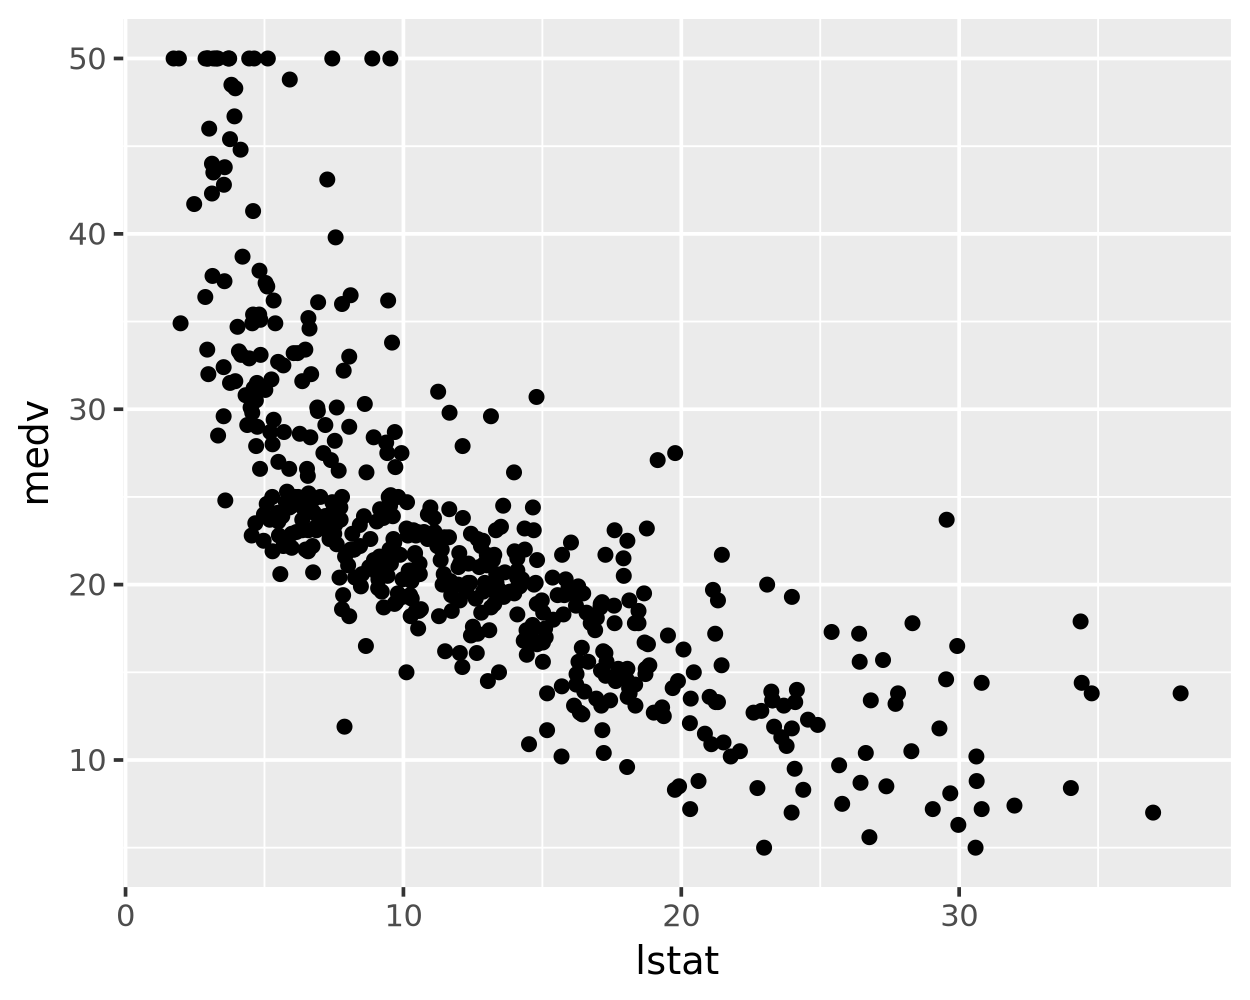

In [4]:
p = ggplot(Boston, aes(x = lstat, y = medv)) + geom_point()

p

`geom_smooth()` using formula = 'y ~ x'


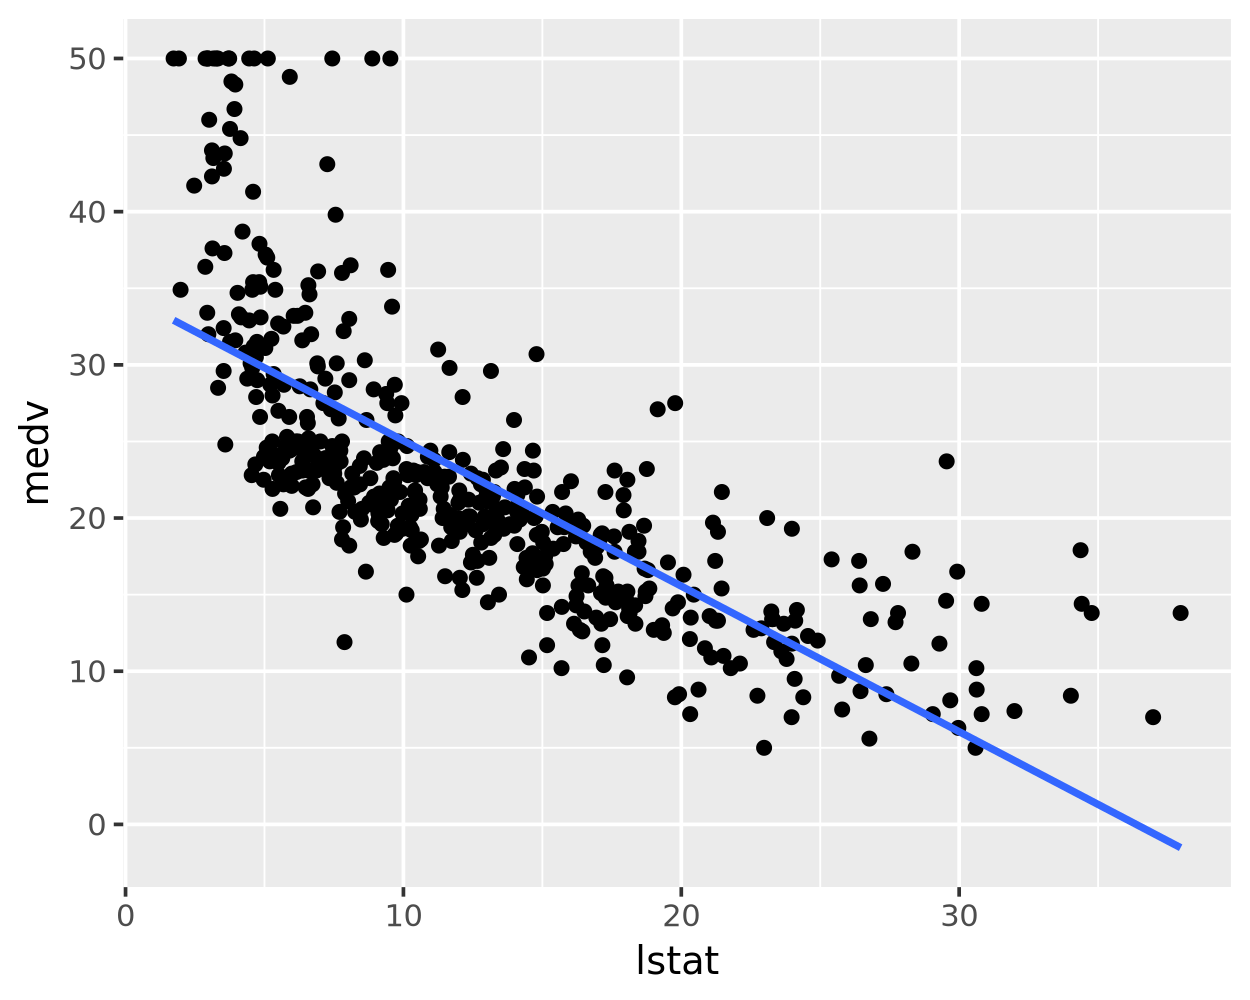

In [6]:
p + geom_smooth(method = "lm", se = FALSE)

❓Does the relationship appear to be positive or negative? Does it look to be reasonably linear?

**Answer:**

- From the 1st graph above we can see the slope is downwards as the x value move from left to right correspond to high to lower medv, we can conclude that the relationship is *negative*.
- From the 2nd graph, which helps us to visualize teh trend *is reasonably linear*

### Let's build a model!

We need to first load the [Tidymodels]() package.

In [7]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



First we specify our model as `linear regression` using the `lm` engine.

In [8]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


Next we "fit" our model by supplying the `formula` and the data.

In [9]:
mod_fit = mod |> fit(medv ~ lstat, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ lstat, data = data)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


### Get the regression table

In [10]:
# We can use the tidy function to get a table of our model information
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.5538409,0.56262735,61.41515,3.743081e-236
lstat,-0.9500494,0.03873342,-24.52790,5.081103e-88


❓Comparing on the chart above and the regression table, does the **sign** of the `estimate` for the `lstat` term coefficient fit your expectations?

**Answer:**

### Making predictions and visualizing the model

We can use the `augment` function to "predict" `medv` for all the values in our original dataset. We will capture these predictions in a new data frame called `Boston2`. The predicted values are found in the `.pred` column.

In [ ]:
Boston2 = augment(mod_fit, Boston)

glimpse(Boston2)

Let's visualize our model.

In [ ]:
p = ggplot(Boston2, aes(x = lstat)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

### Put your skills to practice independently!

In cells below, build a model of `medv` with the `rm` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

❓Does your model indicate a positive relationship beteen number of rooms and home value? 

**Answer:**

## Linear model with one categorical variable

We will use the `Carseats` data from the `ISLR2` package for the following exercise.

In [ ]:
Carseats |> glimpse()

Below is a plot of `sales` versus `ShelveLoc`.

In [ ]:
p = ggplot(Carseats, aes(x = ShelveLoc, y = Sales)) + 
    geom_point(position = position_jitter(width = 0.3, height = 0))

p

❓Does it look like a "Good" shelf location is associated with more car seat sales?

**Answer:**

In cells below, using the `Carseats` data build a model of `Sales` with the `ShelveLoc` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

📊 *Here is some example code for plotting your model.*

```r
# The code below assumes your predictions column is called ".pred" and is in a
# data frame called "Carseats2"

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

```

Which `ShelveLoc` category does your intercept term represent? 

**Answer:**